<a href="https://colab.research.google.com/github/sunilneupane27/week9/blob/main/week_3_2_portynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, classification_report
from imblearn.over_sampling import SMOTE
import numpy as np

In [ ]:
csvfile = "36bcb896-972d-4424-a2d2-89229d6bef8b.csv"
csvfilePath = '/content/titanic (1).csv'   # update this path to match your Google Drive folder
titanic = pd.read_csv(csvfilePath)
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,1
4,5,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,0


In [ ]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

# Handle missing Age values
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

# ==========================
# 3️⃣ Define Features and Target
# ==========================
# Use comparable numerical features
feature_cols = ['Pclass', 'Sex', 'Age', 'Fare']
X = titanic[feature_cols]
y = titanic['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# ==========================
# 5️⃣ Train Logistic Regression Model
# ==========================
logreg = LogisticRegression(random_state=16, max_iter=500)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


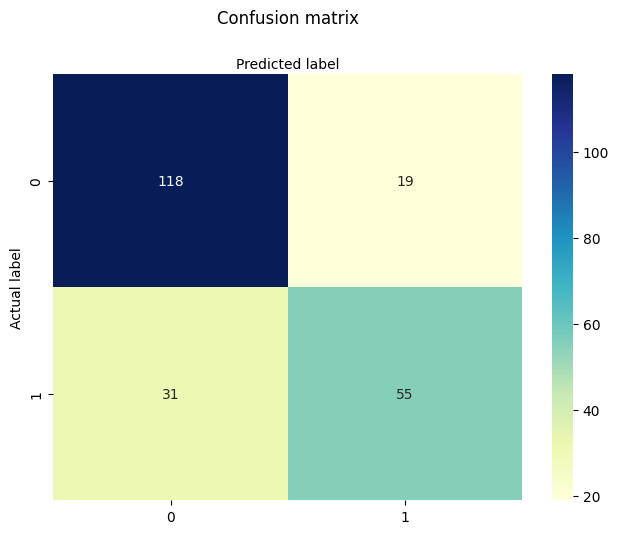

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names = [0, 1]
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Did not survive', 'Survived']))


Precision: 0.7432432432432432
Recall: 0.6395348837209303

Classification Report:
                  precision    recall  f1-score   support

Did not survive       0.79      0.86      0.83       137
       Survived       0.74      0.64      0.69        86

       accuracy                           0.78       223
      macro avg       0.77      0.75      0.76       223
   weighted avg       0.77      0.78      0.77       223



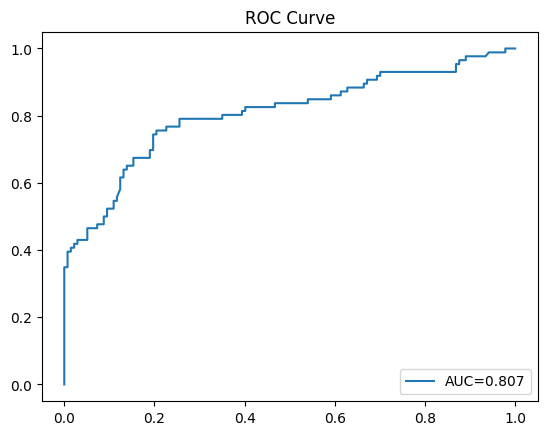

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC="+str(round(auc,3)))
plt.legend(loc=4)
plt.title("ROC Curve")
plt.show()

In [ ]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(y_resampled.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

Survived
0    549
1    549
Name: count, dtype: int64


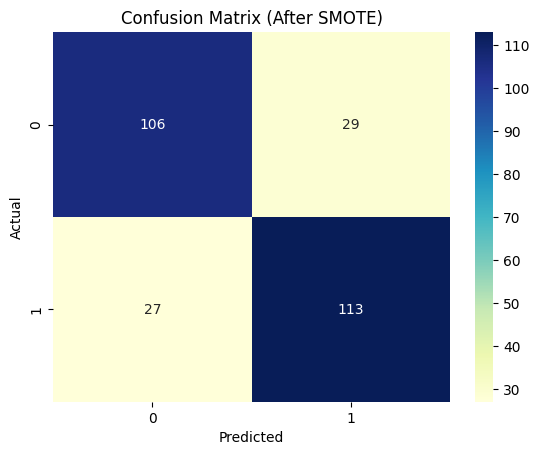

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix (After SMOTE)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
# Performance Metrics (SMOTE)
print("Precision (SMOTE):", precision_score(y_test, y_pred))
print("Recall (SMOTE):", recall_score(y_test, y_pred))
print("\nClassification Report (SMOTE):\n", classification_report(y_test, y_pred, target_names=['Did not survive', 'Survived']))


Precision (SMOTE): 0.795774647887324
Recall (SMOTE): 0.8071428571428572

Classification Report (SMOTE):
                  precision    recall  f1-score   support

Did not survive       0.80      0.79      0.79       135
       Survived       0.80      0.81      0.80       140

       accuracy                           0.80       275
      macro avg       0.80      0.80      0.80       275
   weighted avg       0.80      0.80      0.80       275



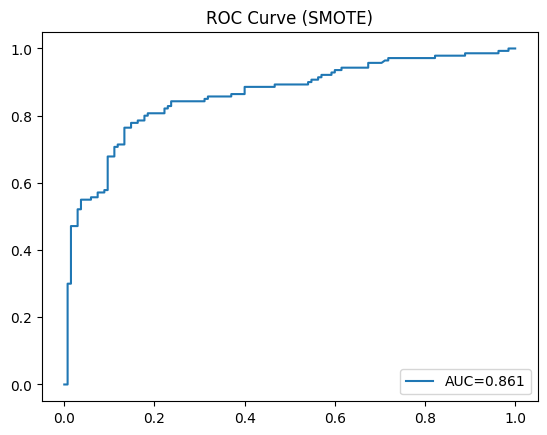

In [ ]:
# ROC Curve (SMOTE)
y_pred_proba = logreg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC="+str(round(auc,3)))
plt.legend(loc=4)
plt.title("ROC Curve (SMOTE)")
plt.show()